In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import latex
from IPython.display import display, Markdown
import matplotlib.colors as mcolors
from itertools import product
import draft_v2
import Helper

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.2.0 (2024-09-15)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

**Introduction**

In the following section, the improved full-spacetime metric is defined/implemented in the code. Based on: https://arxiv.org/abs/2406.03909. In the following, all quoted equations are taken from this paper, unless another source is given.

**Variables**

The metric equations are depndend on four variables.
1. $M$ which refers to the mass of the BH (Blackhole).
2. $R_s=2MG$ which is the gravitational radius of the BH.
3. $Q_b$ which is a defined  quantitie to modifie the spacetime metric.
4. $Q_c$ which is also a defined  quantitie to modifie the spacetime metric.

In the first section of the code we define all these variables, and in the following sections of the code we define various functions that rely on $Q_b$ and $Q_c$. 

**Background of $Q_b$ and $Q_c$**

$Q_b$ and $Q_c$ are defined trough the following mathematical Form (compare eq. 4.19 - 4.20): 

\begin{align}Q_b&=|\beta_b|\gamma^2L_0^2 \\Q_c&=|\beta_c|\gamma^2L_0^6 \end{align}

where $\beta_b$ and $\beta_c$ are the so called GUP parameters and $\gamma$ is the Barbero-Immirzi parameter.

**Immirzi parameter**

"The Immirzi parameter measures the size of the quantum of area in Planck units." [https://en.wikipedia.org/wiki/Immirzi_parameter]. 

Its value is: 

\begin{align} \gamma=\begin{cases} \frac{\ln(2)}{\sqrt{3}\pi} \\\frac{\ln(3)}{\sqrt{8}\pi}\end{cases} \end{align}

Note: The way of choosing the Immirzi parameter recovers the Bekenstein-Hawking formula. (For more information, see the Wikipedia article linked above)

**GUP paramters $\beta_b$ and $\beta_c$**

The GUP parameters are used to generalise the uncertainty principle. More information can be found either in section 3.1 of https://arxiv.org/abs/2406.03909 or on Wikipedia https://en.wikipedia.org/wiki/Generalized_uncertainty_principle.

In [2]:
# definig variables 
gamma = Helper.SymbolWithValue('gamma', np.log(2) / (np.sqrt(3) * np.pi))
beta_b, beta_c = Helper.SymbolWithValue('beta_b', 0), Helper.SymbolWithValue('beta_c', 0)
L_0 = Helper.SymbolWithValue('L_0', 5)
M = 1
r = sp.Symbol("r", nonnegative=True)

# definitions to calculate Q_b/c in dependence of beta and L_0 which gives us more possibilitys  to compare the influence of Q_b/c on different eq.

Q_b = Helper.SymbolicFunction2(abs(beta_b) * gamma ** 2 * L_0 ** 2, [gamma, L_0], beta_b, name='Q_b')
Q_c = Helper.SymbolicFunction2(abs(beta_c) * gamma ** 2 * L_0 ** 6, [gamma, L_0], beta_c, name='Q_c')

'''
-----------------------------------------------------------------------------------------------------------------------------------------------------
'''
display(Markdown("## Check definitons:"))

Helper.printTeX(Q_b.sym, Text='Q_b=')
Helper.printTeX(Q_c.sym, Text='Q_c=')

**OGRePy**: A new version of the package is available: **v1.3.0** ([view changelog](https://github.com/bshoshany/OGRePy/blob/master/CHANGELOG.md)). To update, please execute the following commands in a notebook cell:
```
%pip install --upgrade OGRePy
%reset --aggressive -f
from OGRePy import *
```

## Check definitons:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Improved full spacetime metric**

In the following we will impliment the Improved full spacetime metric tensor in the code using the following equations: 
\begin{align}
f(t)&=\left(1+\frac{Q_b}{r^2}\right)\cdot\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{-\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right) \\
g(t)&=\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right)^{-1} \\
h(t)&=r^2\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\\
\text{with: }&\text{diag}(-f,g,h, \sin^2(\theta)h)
\end{align}
[Compare eq. 4.25-4.27] 

In [3]:
R_s = sp.Symbol('R_s')

q_b, q_c = sp.Symbol('Q_b'), sp.Symbol('Q_c')
param= (q_b, q_c, R_s)

f = sp.Lambda((r, param), (1 + q_b / r**2) * (1 + q_c * (R_s)**2 / (4 * r**8))**(-1 / 4) * ( 1 - (R_s)/ sp.sqrt(r**2 + q_b )))
g = sp.Lambda((r, param), (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4) * (1 - R_s / sp.sqrt(r**2 + q_b ))**(-1))
h = sp.Lambda((r, param), r**2 * (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4))


'''
-----------------------------------------------------------------------------------------------------------------------------------------------------
'''
display(Markdown("## Check definitons:"))
Helper.printTeX(f.expr, 'f=')
Helper.printTeX(g.expr, 'g=')
Helper.printTeX(h.expr, 'h=')


## Check definitons:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
Schwarzschield = draft_v2.MetricSystem(f, g, h, (beta_b.value, beta_c.value, L_0.value))
Impr = draft_v2.MetricSystem(f, g, h, (q_b, q_c, R_s))
BlackHole =  draft_v2.BH(M, [Schwarzschield, Impr], ['Schwarzschield', 'Impr'])

display(Markdown("## Check definitons:"))
display(Markdown("Schwarzschield:"))
~BlackHole.Schwarzschield()
Helper.printTeX(BlackHole.Schwarzschield().line_element())
display(Markdown("Improved:"))
~BlackHole.Impr()

## Check definitons:

Schwarzschield:

$$\begin{align*}
    \eta{}_{t}{}_{t} &= -1 + \frac{5}{r} \\
    \eta{}_{r}{}_{r} &= \frac{1}{1 - \frac{5}{r}} \\
    \eta{}_{\theta}{}_{\theta} &= r^{2} \\
    \eta{}_{\phi}{}_{\phi} &= r^{2} \sin^{2}{\left(\theta \right)} 
\end{align*}$$

<IPython.core.display.Math object>

Improved:

$$\begin{align*}
    \eta{}_{t}{}_{t} &= - \frac{\left(\frac{Q_{b}}{r^{2}} + 1\right) \left(- \frac{R_{s}}{\sqrt{Q_{b} + r^{2}}} + 1\right)}{\left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25}} \\
    \eta{}_{r}{}_{r} &= \frac{\left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25}}{- \frac{R_{s}}{\sqrt{Q_{b} + r^{2}}} + 1} \\
    \eta{}_{\theta}{}_{\theta} &= r^{2} \left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25} \\
    \eta{}_{\phi}{}_{\phi} &= r^{2} \left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25} \sin^{2}{\left(\theta \right)} 
\end{align*}$$


Comment: As you can see, we created the Scharzschield metric using the improved metric and setting the parameters to 0.

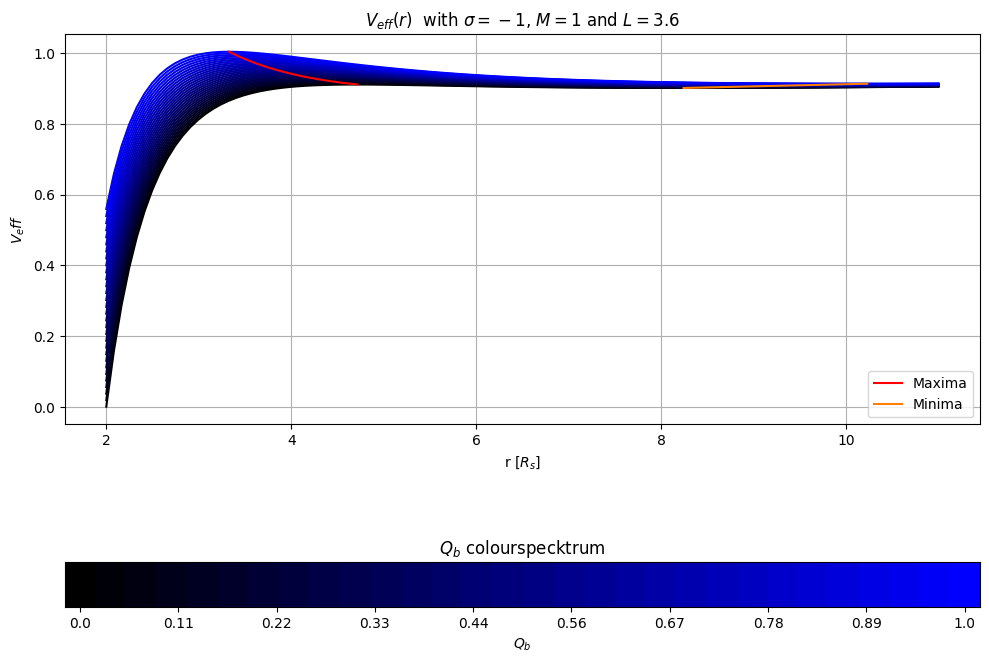

In [5]:
Helper.Veff_plt( BlackHole.Impr,sigma=-1, grad=30,L=3.6, r_int=[2,11])

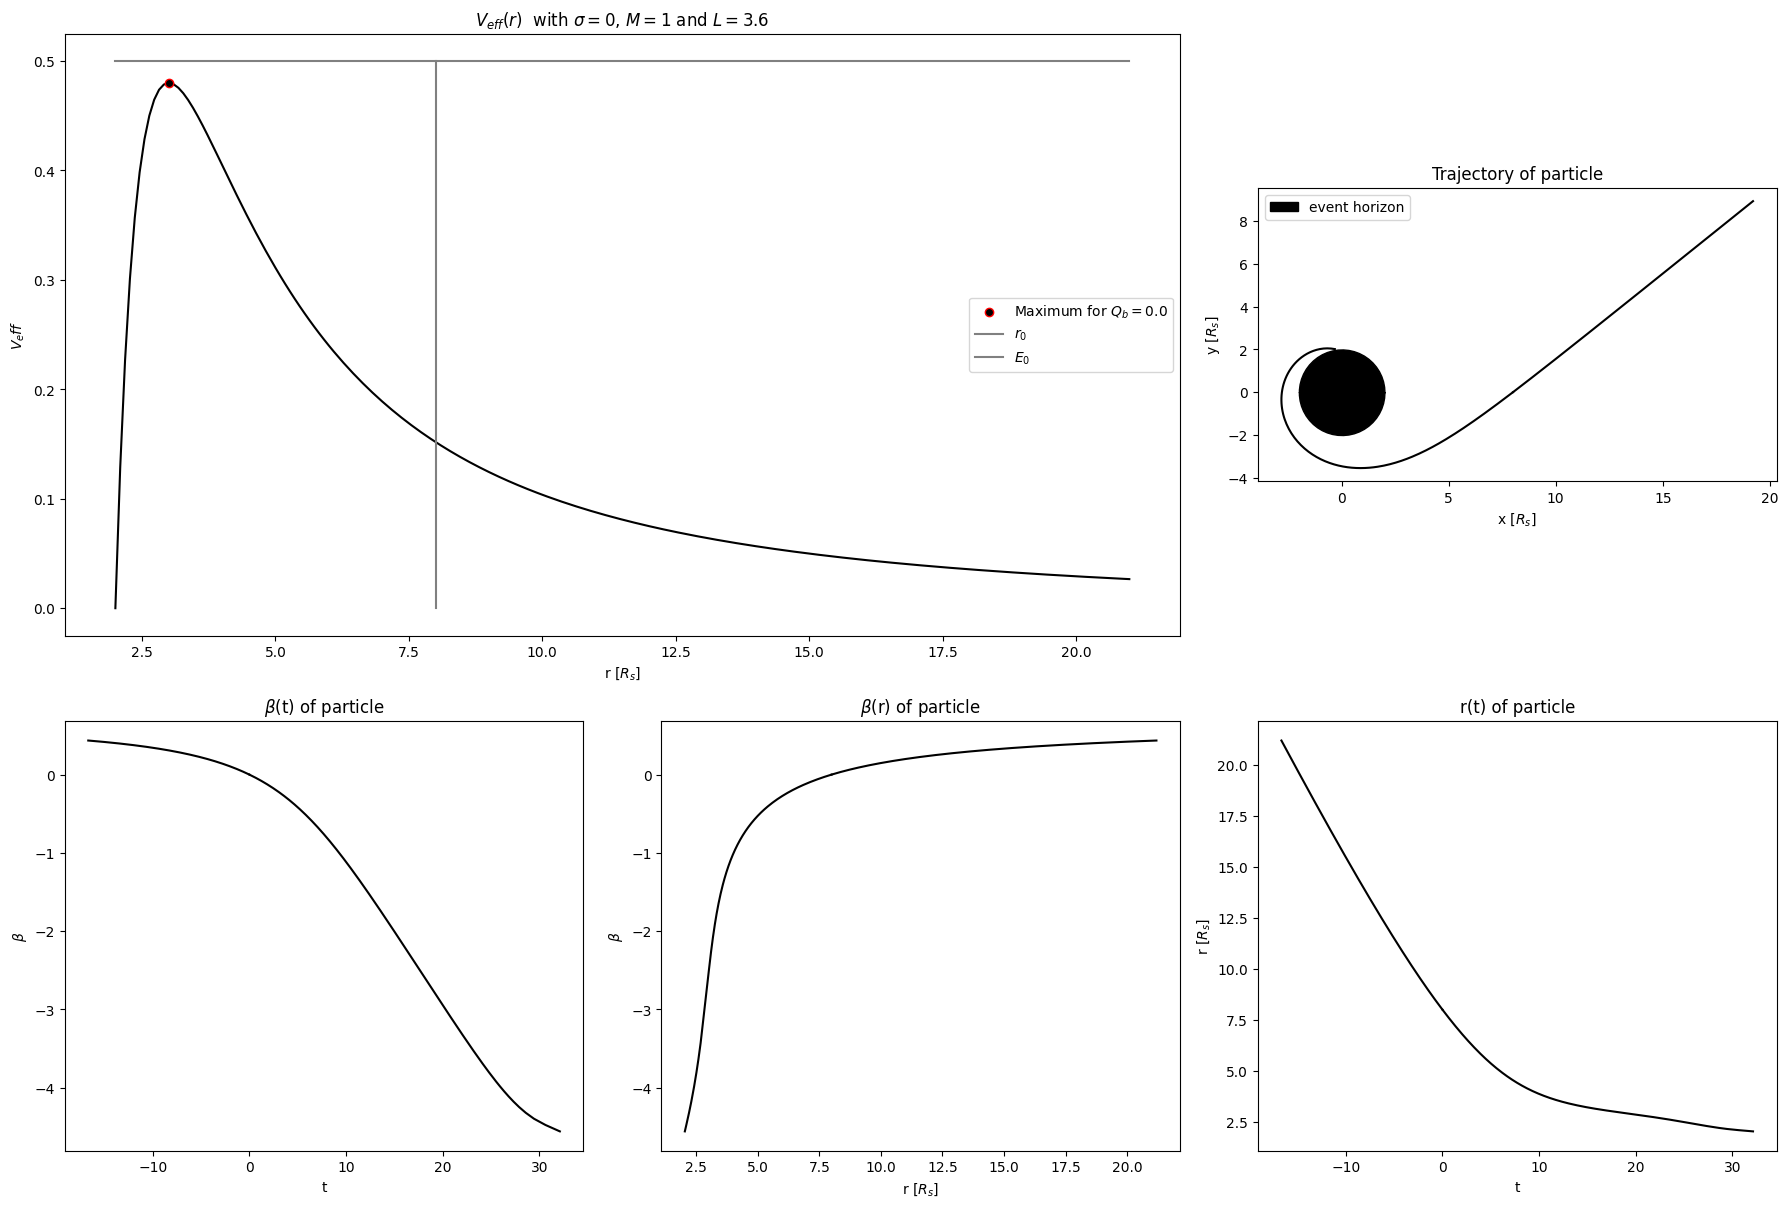

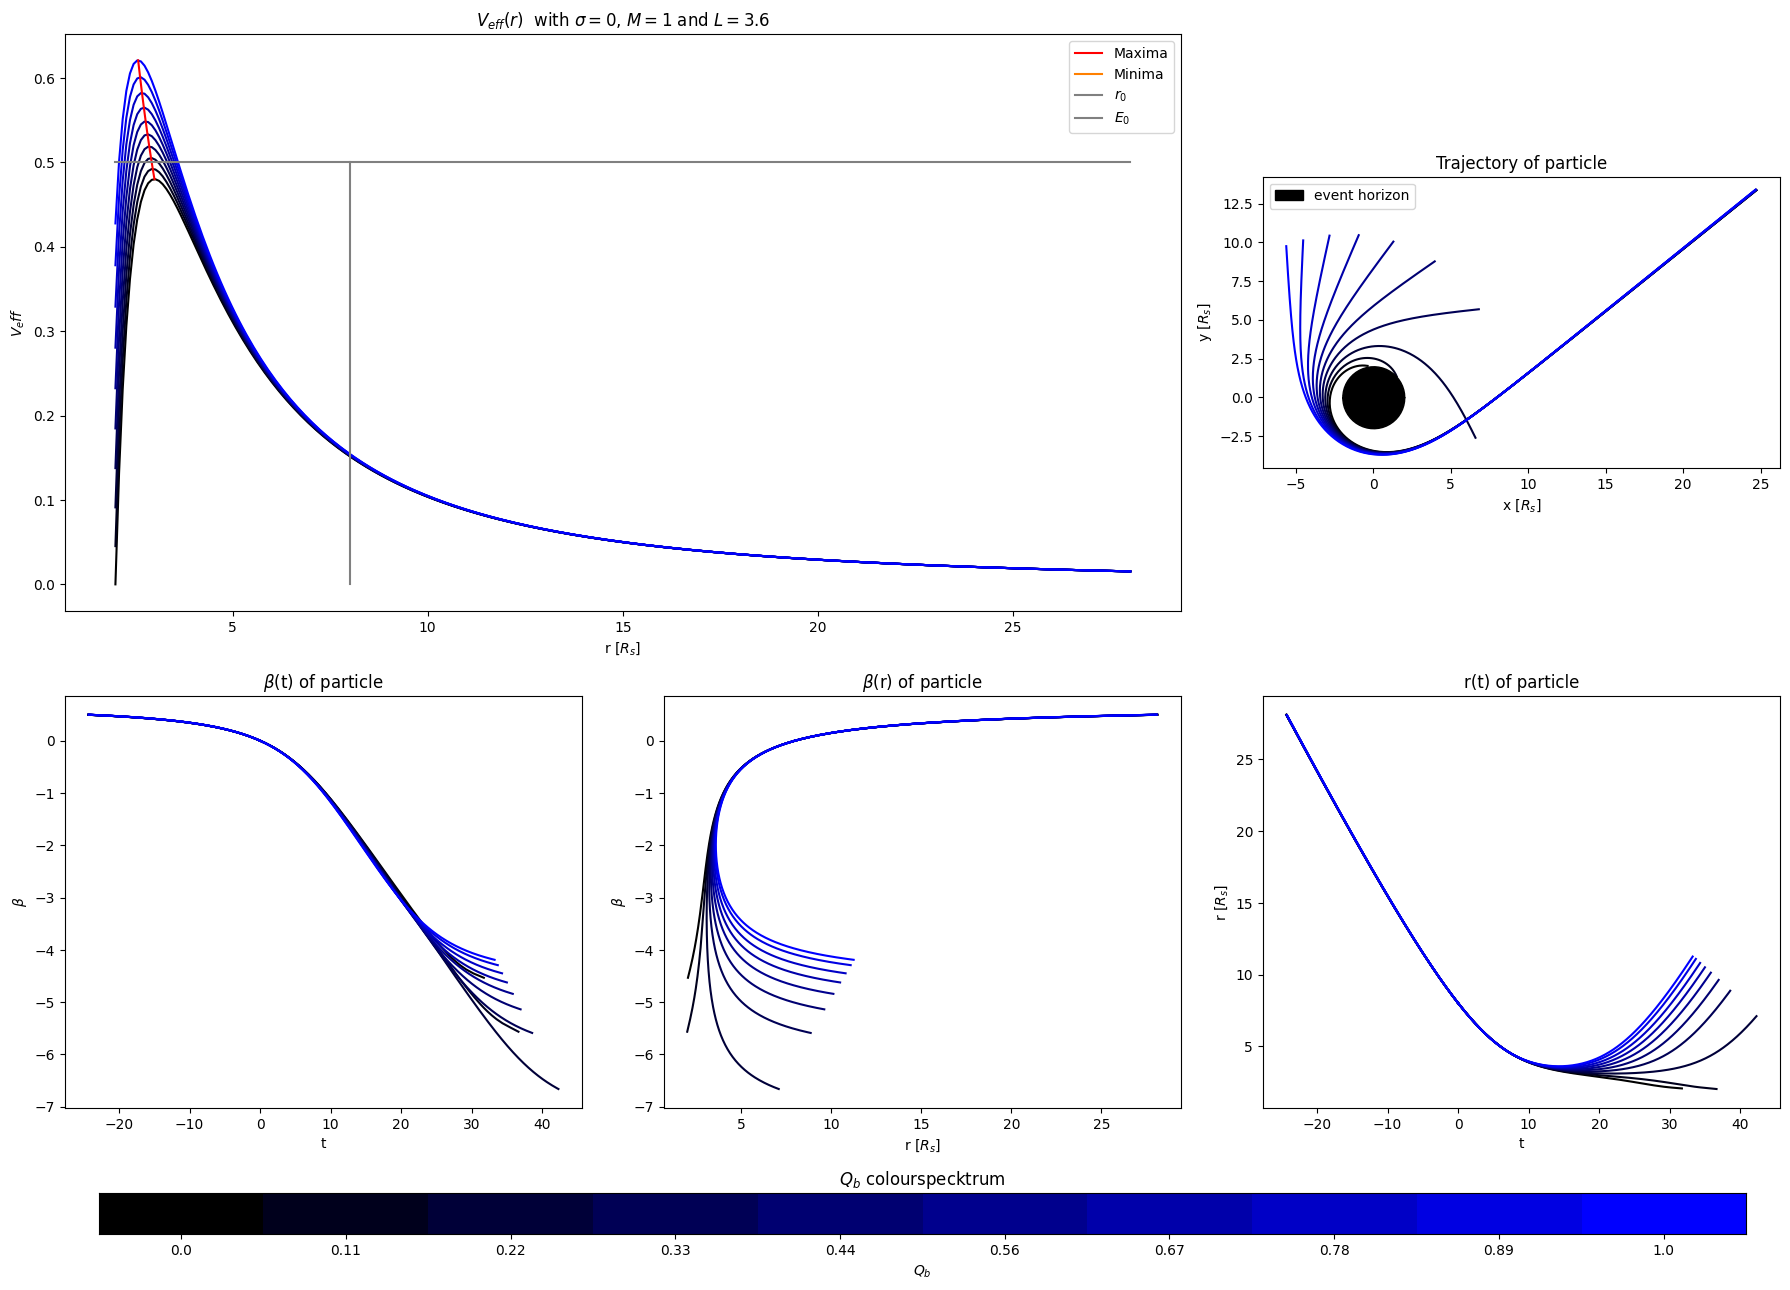

In [6]:
Helper.trPlot(BlackHole.Impr, grad=1,sigma=0, E = -np.sqrt(0.5),L=3.6, end=20, M=1, r_0=8)
Helper.trPlot(BlackHole.Impr, grad=10,sigma=0, E = -np.sqrt(0.5),L=3.6, end=30, M=1, r_0=8)

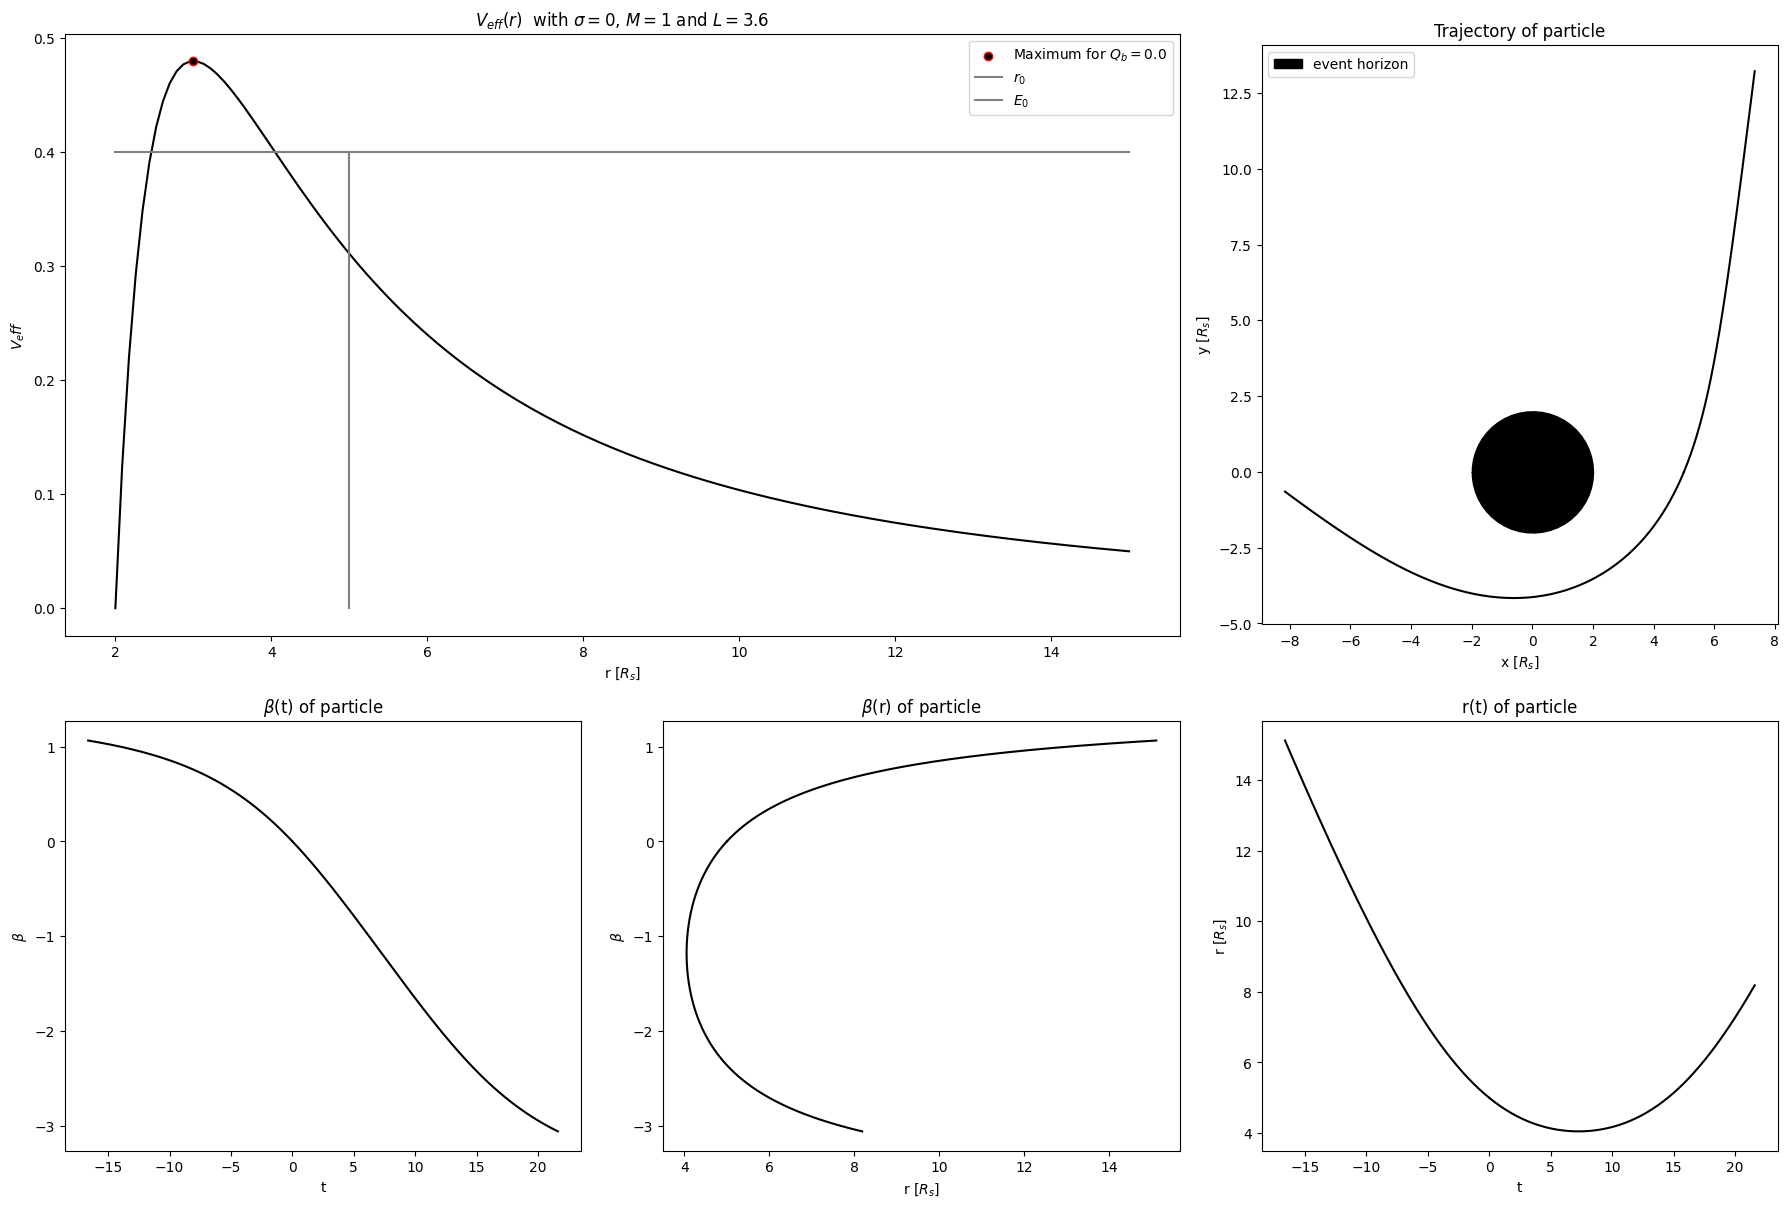

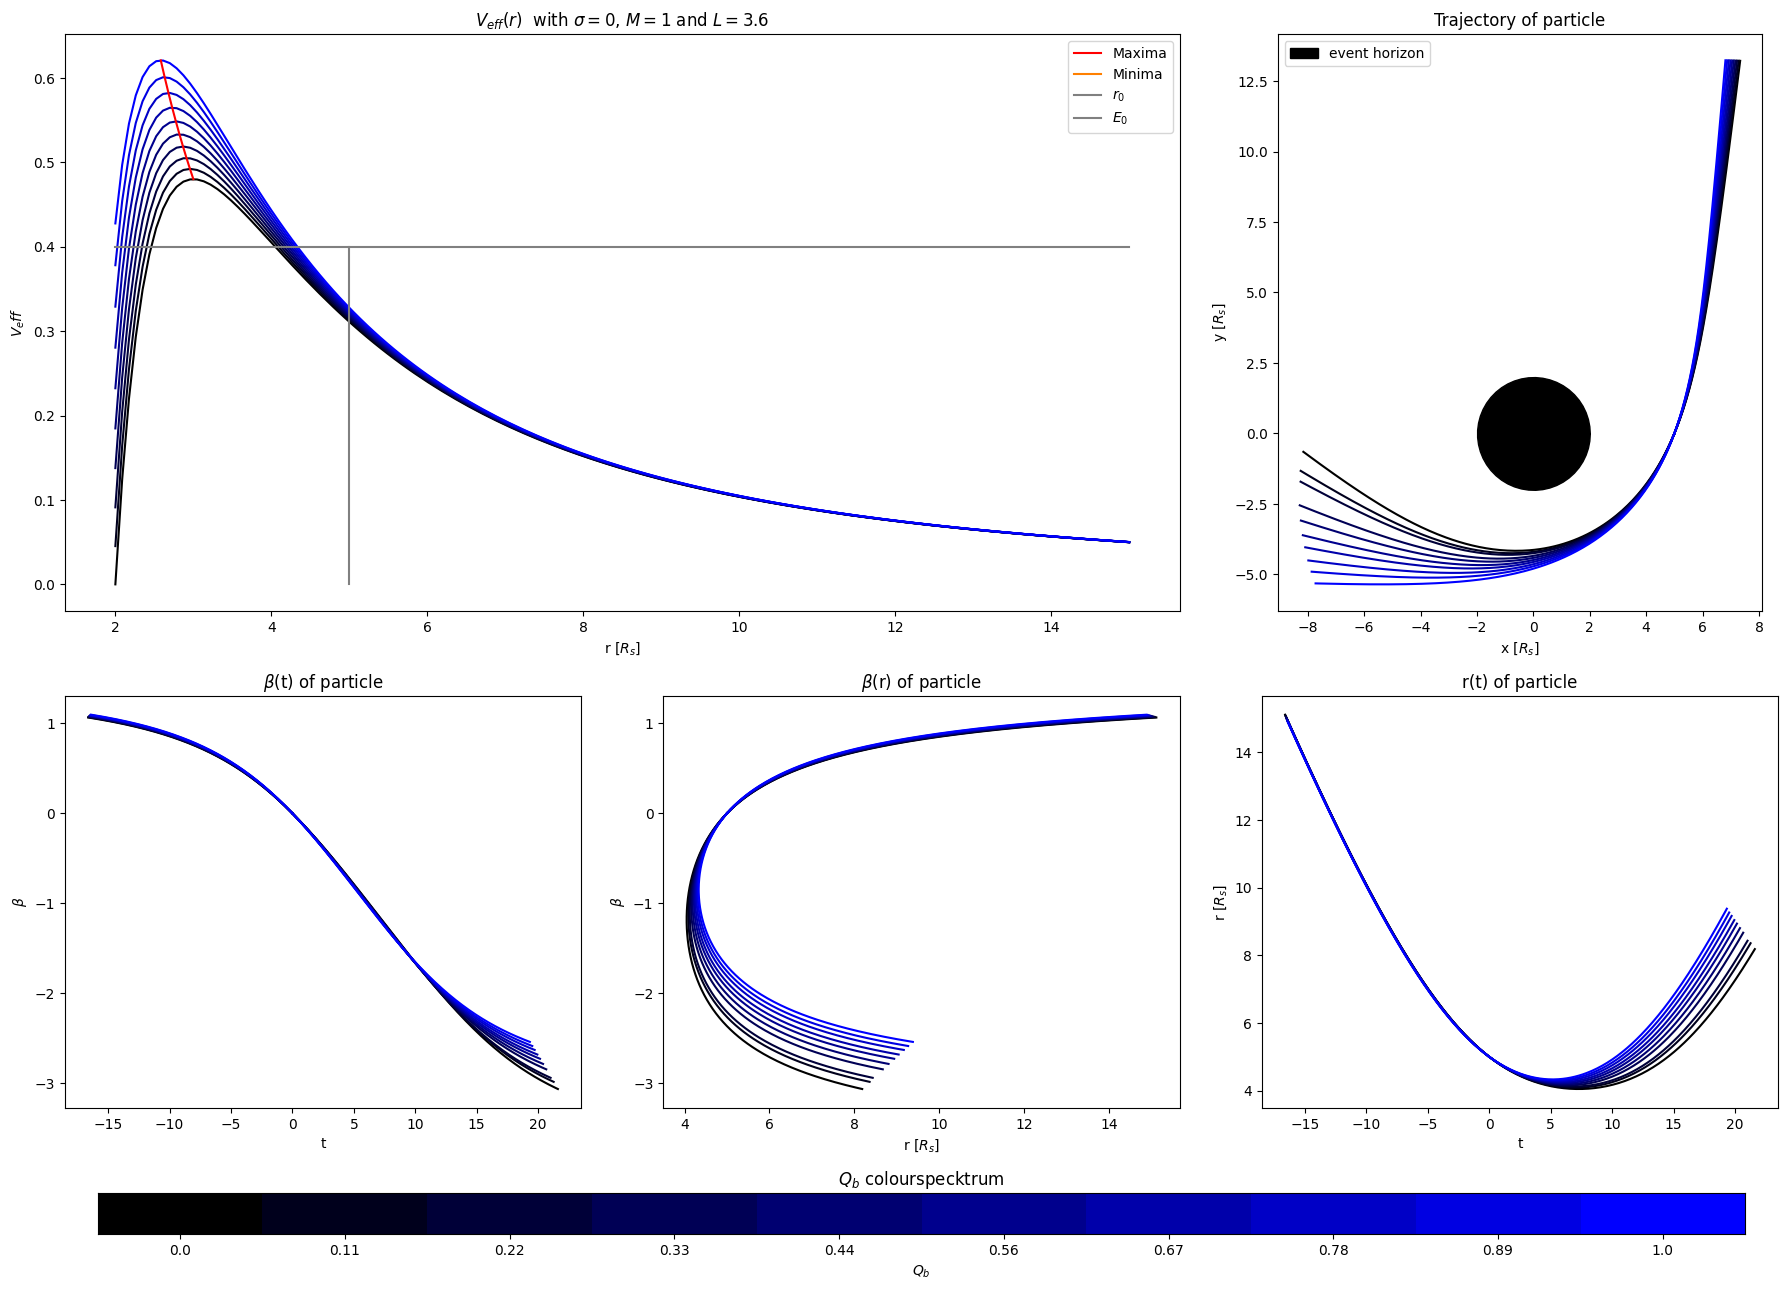

In [7]:
Helper.trPlot(BlackHole.Impr, grad=1, sigma=0, E = -np.sqrt(0.4),L=3.6, end=20, M=1, r_0=5)
Helper.trPlot(BlackHole.Impr, grad=10, sigma=0, E = -np.sqrt(0.4),L=3.6, end=20, M=1, r_0=5)

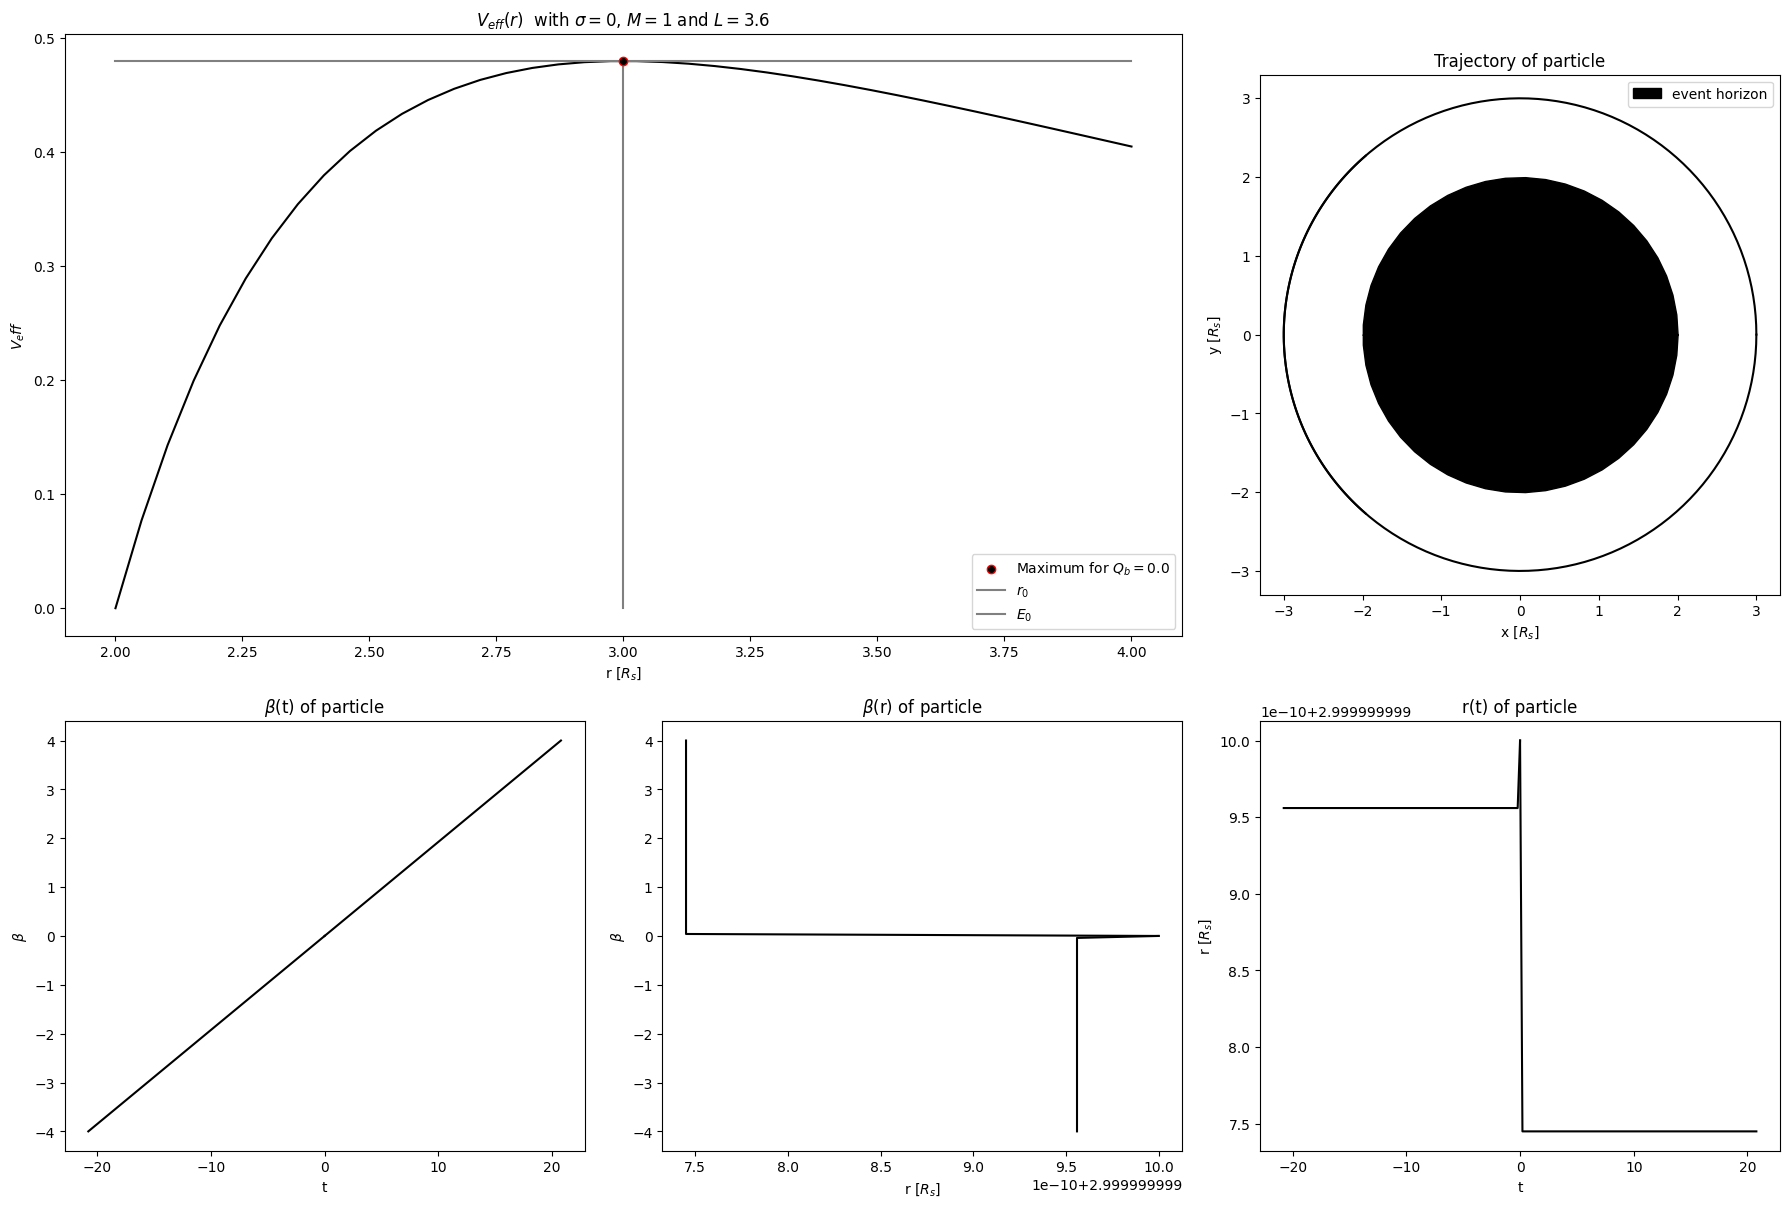

In [8]:
Helper.trPlot(BlackHole.Impr, grad=1, sigma=0, E = np.sqrt(0.48),L=3.6, end=10, M=1, r_0=3)

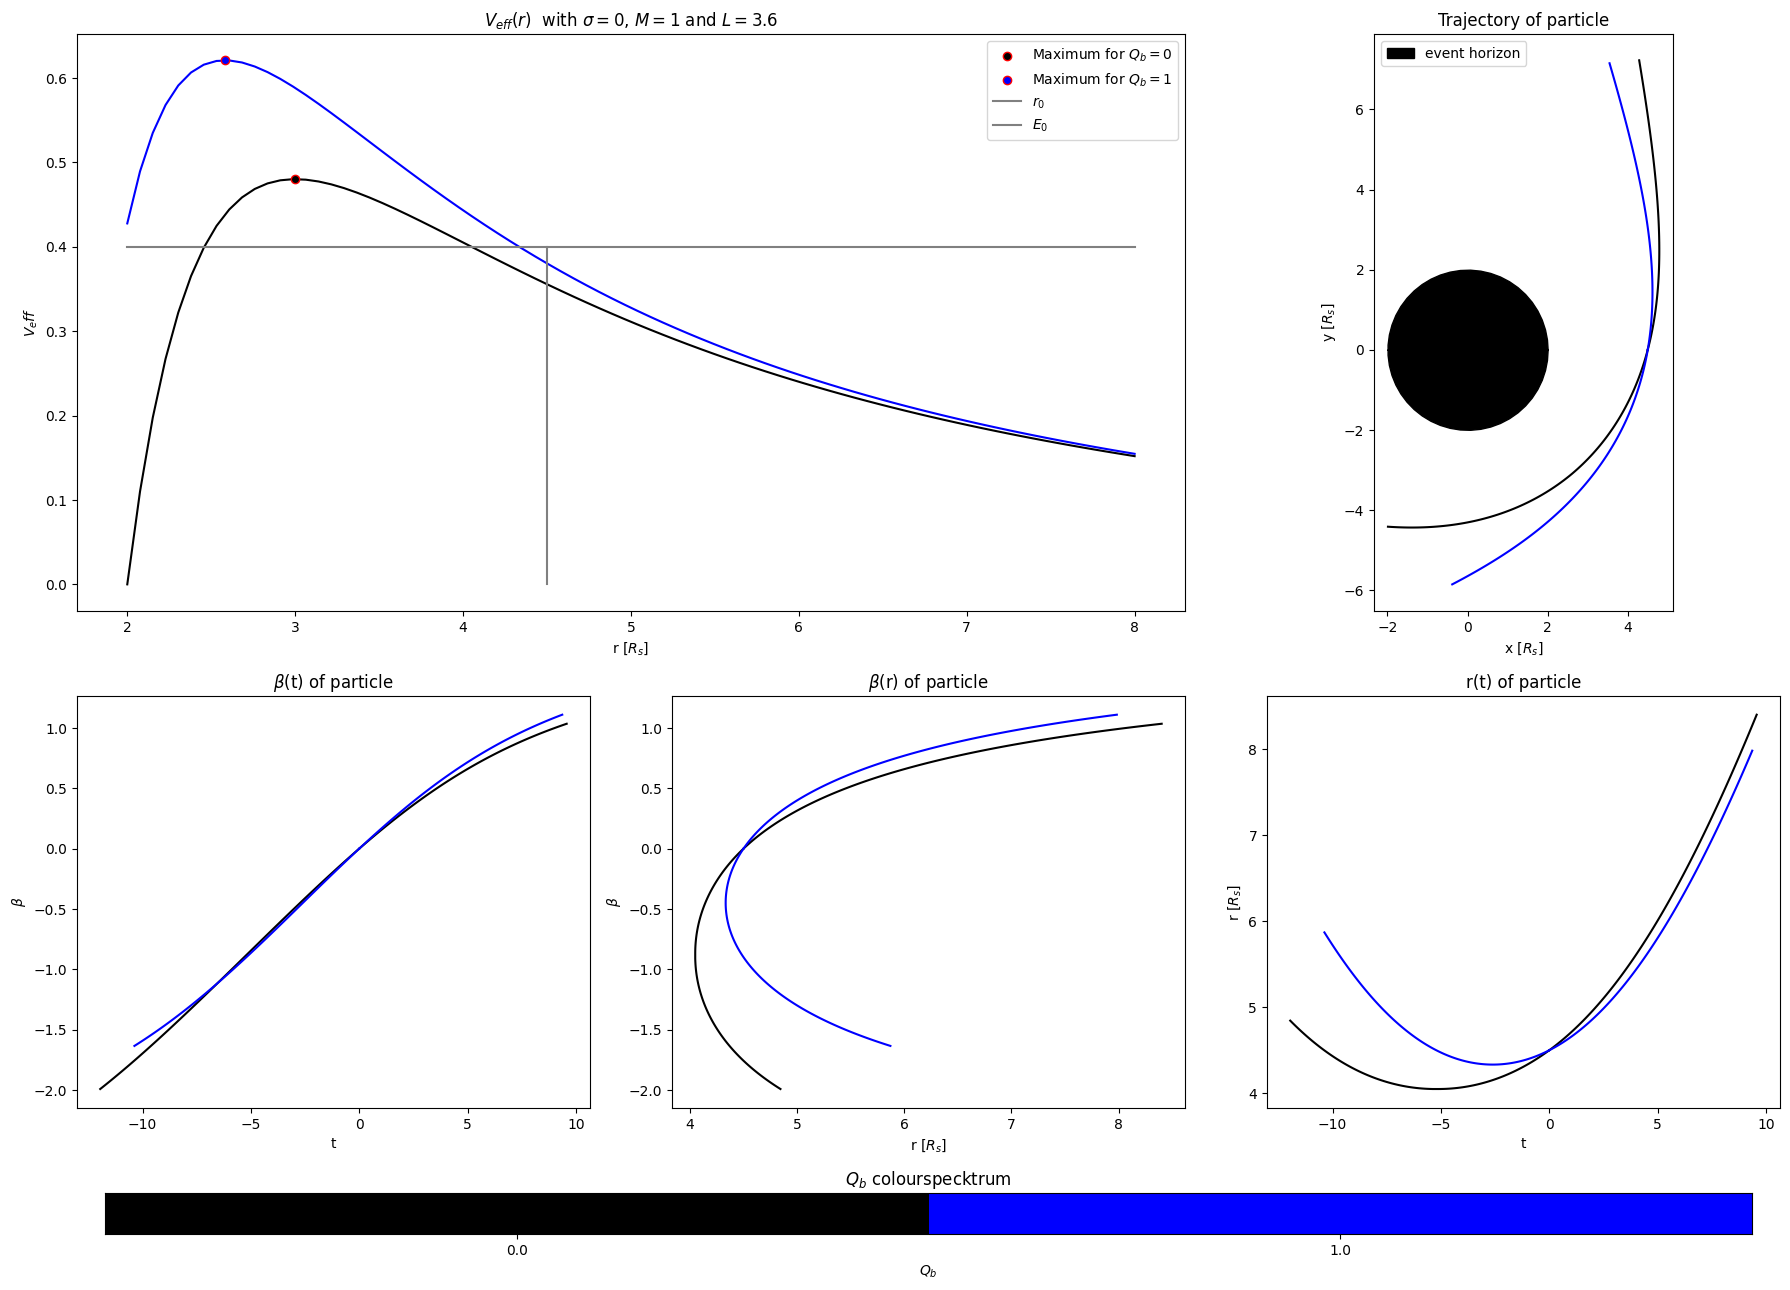

In [9]:
Helper.trPlot(BlackHole.Impr, sigma=0, E = np.sqrt(0.4),L=3.6, end=10, M=1, r_0=4.5, param=[(0,0,2),(1,0,2)])

z: 1, tau 0.0, r: 5.0 and dr/dtau: 0.4110474425172841, argument: 0.16895999999999997
z: 1, tau 8.591968922702672e-06, r: 5.000003531706852 and dr/dtau: 0.411047798843076, argument: 0.1689602929337379
z: 1, tau 4.519388709591704e-05, r: 5.0000185768317085 and dr/dtau: 0.4110493167886739, argument: 0.1689615408324356
z: 1, tau 6.779083064387557e-05, r: 5.000027865342856 and dr/dtau: 0.41105025392686145, argument: 0.16896231125333727
z: 1, tau 0.00010168624596581335, r: 5.000041798085754 and dr/dtau: 0.4110516596228365, argument: 0.16896346687868827
z: 1, tau 0.00024199251094229353, r: 5.000099471617027 and dr/dtau: 0.41105747828095524, argument: 0.16896825045069797
z: 1, tau 0.00028639896409008906, r: 5.000117725262566 and dr/dtau: 0.4110593198453809, argument: 0.16896976443174716
z: 1, tau 0.0002147992230675668, r: 5.00008829362802 and dr/dtau: 0.4110563505526835, argument: 0.16896732332969067
z: 1, tau 0.00026436827454469765, r: 5.00010866935237 and dr/dtau: 0.4110584062196512, argumen

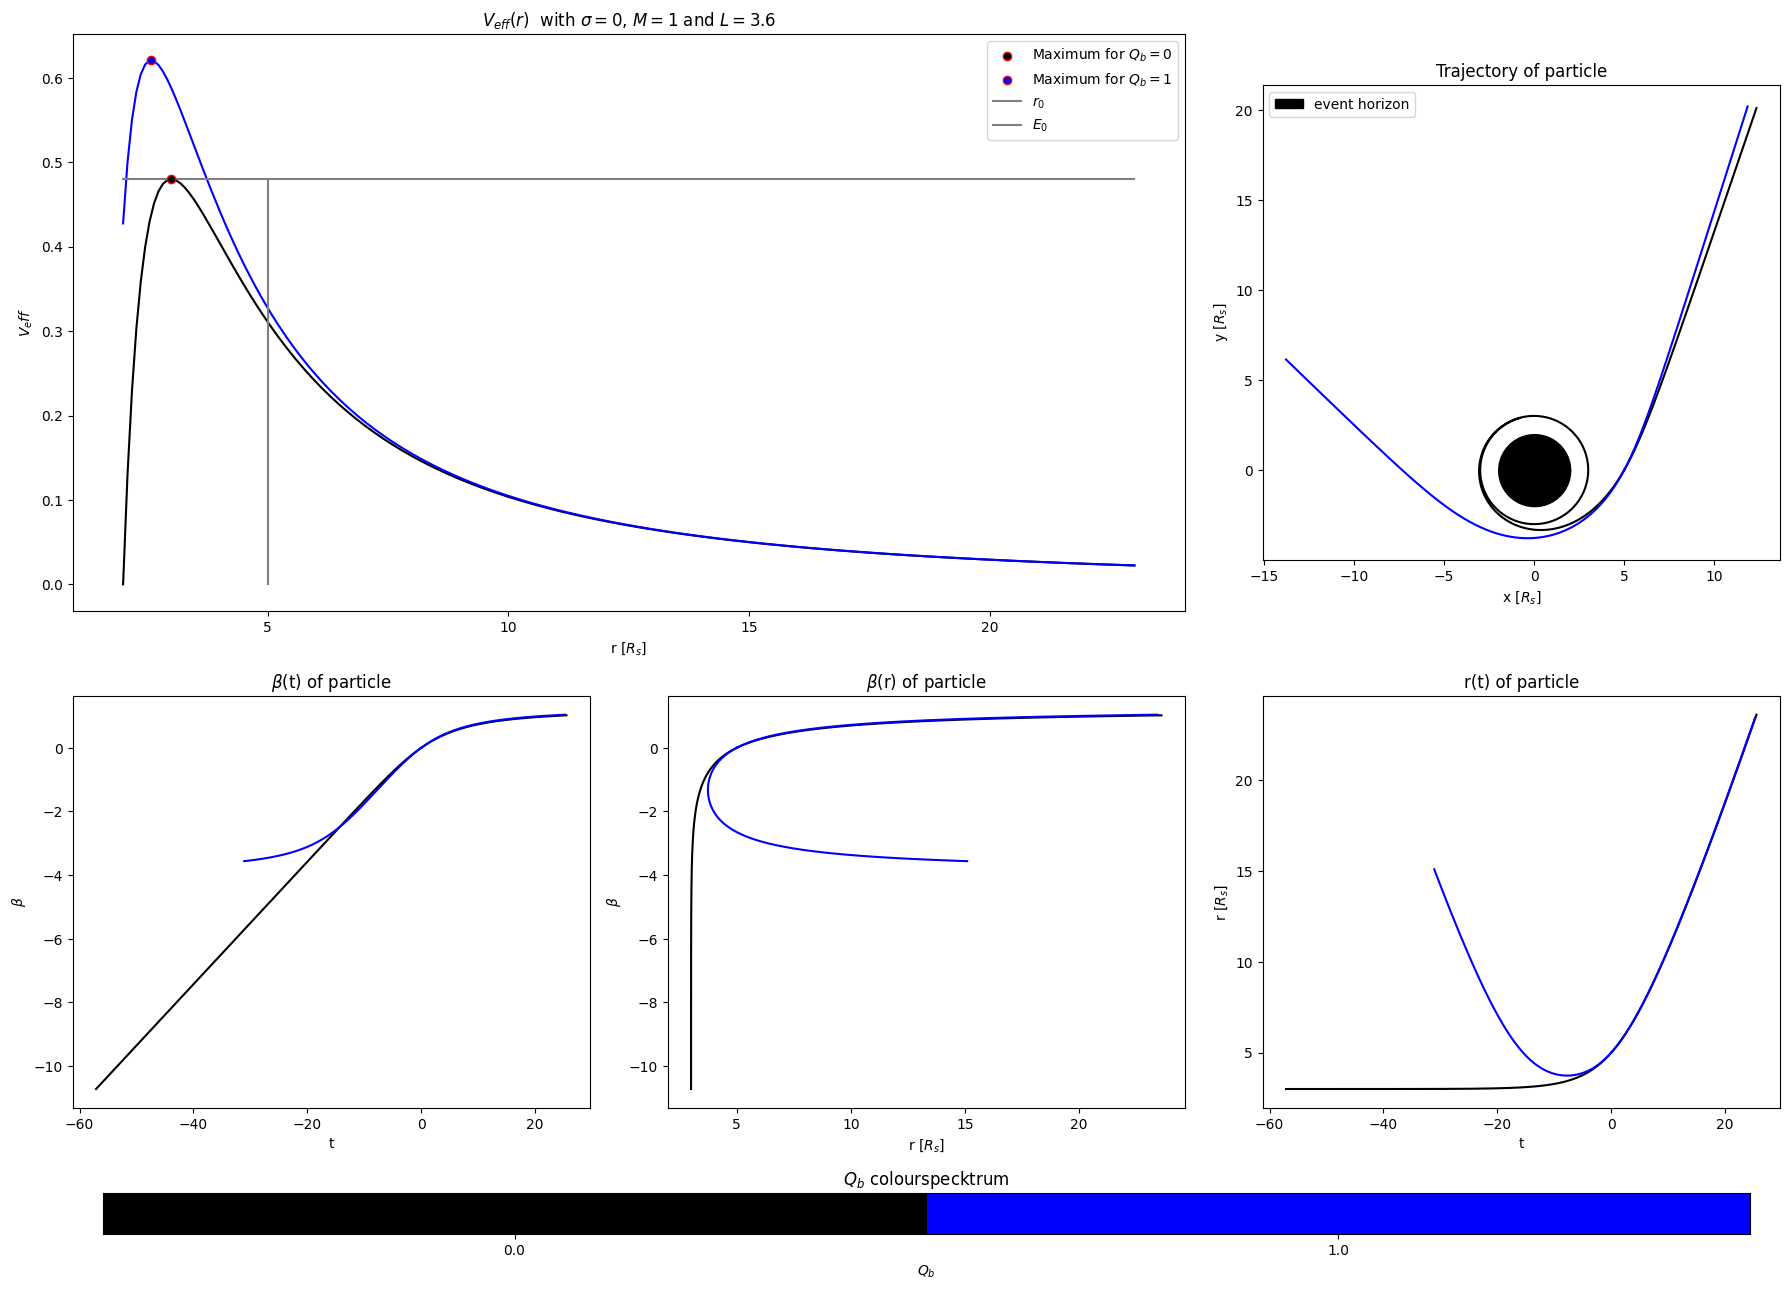

In [10]:
Helper.trPlot(BlackHole.Impr, sigma=0, E = np.sqrt(0.48),L=3.6, end=30, M=1, r_0=5, param=[(0,0,2), (1,0,2)], debug=True)